AADITIYA JAIN 


Reg No. - 229310427


Recommender System Project

<div style="background-color:#166534; color:#fde047; padding: 20px; border-radius: 10px;">
  <h1 style="font-size:26px; font-family:calibri;"><b>📦 Personalized Workout Program Recommender</b></h1>
  <p style="font-size:18px; font-family:calibri; line-height:1.6em;">
    Your AI Gym Buddy — 24/7, no spotter needed. A smart system that recommends fitness plans tailored to your goals, gear, and grind.
  </p>
</div>

<div style="background-color:#166534; color:#fde047; padding: 20px; border-radius: 10px;">
  <h2 style="font-size:22px; font-family:calibri;"><b>🧠 Introduction: The Why Behind the Workout</b></h2>
  <p style="font-size:18px; font-family:calibri; line-height:1.6em;">
    We live in an era where workout plans are endless — HIIT, hypertrophy, calisthenics, bro-splits, you name it. But picking the right one for your body and goals? That’s the hard part.
  </p>
  <p style="font-size:18px; font-family:calibri;">
    This notebook builds an <b>AI-powered fitness recommender</b> that suggests customized workout programs based on your goals, gear, and level. It blends deep learning and metadata — so you spend less time browsing and more time lifting.
  </p>
</div>

<div style="background-color:#166534; color:#fde047; padding: 20px; border-radius: 10px;">
  <h2 style="font-size:22px; font-family:calibri;"><b>📌 Problem Statement</b></h2>
  <p style="font-size:18px; font-family:calibri;">
    Can we recommend personalized workout programs based on user traits — even without explicit user IDs or ratings?
  </p>
  <ul style="font-size:18px; font-family:calibri; line-height:1.8em;">
    <li>💡 Use metadata (goal, level, equipment)</li>
    <li>🧠 Encode text with SentenceTransformers</li>
    <li>🔍 Cluster users by interests via KMeans</li>
    <li>🎯 Retrieve personalized plans via embeddings</li>
  </ul>
</div>

<div style="background-color:#166534; color:#fde047; padding: 20px; border-radius: 10px;">
  <h2 style="font-size:22px; font-family:calibri;"><b>📁 About the Dataset</b></h2>
  <ul style="font-size:18px; font-family:calibri;">
    <li>📦 2,598 workout programs with rich metadata</li>
    <li>💪 605,033 linked exercises with details</li>
    <li>🧼 Minimal missing values — clean and ready</li>
    <li>🧩 Ideal for personalization, clustering, and recommendations</li>
  </ul>
</div>

<div style="background-color:#166534; color:#fde047; padding: 20px; border-radius: 10px;">
  <h2 style="font-size:22px; font-family:calibri;"><b>🛠️ Project Workflow</b></h2>
  <ul style="font-size:18px; font-family:calibri; line-height:1.8em;">
    <li>📥 Load & clean data</li>
    <li>🧼 Preprocess metadata + exercise text</li>
    <li>🧠 Embed titles + descriptions with SentenceTransformers</li>
    <li>🔍 Cluster with KMeans (user simulation)</li>
    <li>🎯 Retrieve plans via cosine similarity</li>
    <li>👤 Generate personalized recommendations per user segment</li>
    <li>📊 Visualize clusters to explore fitness goals</li>
  </ul>
</div>

<div style="background-color:#166534; color:#fde047; padding: 20px; border-radius: 10px;">
  <h2 style="font-size:22px; font-family:calibri;"><b>👨‍💻 About the Author</b></h2>
  <p style="font-size:18px; font-family:calibri; line-height:1.6em;">
    Hey! I'm <b>Denver Magtibay</b>, an <b>Agentic AI Engineer</b> and <b>Electronics Engineer</b> based in the Philippines. I design systems that think and adapt — even in fitness personalization.
  </p>
  <p style="font-size:18px; font-family:calibri;">
    My mission is to show how AI can be deployed in ways that are impactful, explainable, and easy to build on. Every notebook I write is a blueprint — not just for models, but for real-world problem-solving.
  </p>
  <p style="font-size:18px; font-family:calibri;">
    🔗 <b>Connect:</b>
    <a href="https://www.linkedin.com/in/denvermagtibay/" target="_blank" style="color:#fef9c3;">LinkedIn</a> |
    <a href="https://www.kaggle.com/denvermagtibay" target="_blank" style="color:#fef9c3;">Kaggle</a> |
    <a href="mailto:engr.denver.magtibay@gmail.com" style="color:#fef9c3;">Email</a>
  </p>
</div>

# 🧱 Environment Setup & Data Loading

In [1]:
# Step 1: setup & load data
import pandas as pd
import numpy as np

# file paths
EXERCISES_PATH = '/kaggle/input/600k-fitness-exercise-and-workout-program-dataset/programs_detailed_boostcamp_kaggle.csv'
SUMMARY_PATH   = '/kaggle/input/600k-fitness-exercise-and-workout-program-dataset/program_summary.csv'

# load datasets
ex_df = pd.read_csv(EXERCISES_PATH)
prog_df = pd.read_csv(SUMMARY_PATH)

print('Exercises shape:', ex_df.shape)
print('Programs shape:', prog_df.shape)

# inspect columns
print(ex_df.columns.tolist())
print(prog_df.columns.tolist())

Exercises shape: (605033, 16)
Programs shape: (2598, 10)
['title', 'description', 'level', 'goal', 'equipment', 'program_length', 'time_per_workout', 'week', 'day', 'number_of_exercises', 'exercise_name', 'sets', 'reps', 'intensity', 'created', 'last_edit']
['title', 'description', 'level', 'goal', 'equipment', 'program_length', 'time_per_workout', 'total_exercises', 'created', 'last_edit']


# 📊 Exploratory Data Analysis (EDA) & Preprocessing
We’ll explore distributions, missing values, and prepare key fields for modeling.

We’re building a personalized program recommender using:

1. Metadata features: goal, level, equipment, program_length, etc.

2. Text fields: title, description, exercise_name

3. Personalization layer: modeled via user history, i.e., users who interacted with similar programs

# 🧼 Cleaning Metadata and Text

In [2]:
import pandas as pd
import numpy as np
import re
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# --- Clean metadata: fill and normalize ---
for col in ['goal', 'level', 'equipment']:
    prog_df[col] = prog_df[col].fillna('unknown').str.lower().str.strip()

# Normalize numeric fields
scaler = MinMaxScaler()
prog_df[['program_length', 'time_per_workout']] = scaler.fit_transform(prog_df[['program_length', 'time_per_workout']])

# --- Clean text: title + description ---
def clean_text(text):
    if pd.isna(text): return ''
    text = text.lower()
    text = re.sub(r'<.*?>', '', text)           # remove HTML
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # remove punctuation
    return text.strip()

prog_df['clean_title'] = prog_df['title'].apply(clean_text)
prog_df['clean_desc'] = prog_df['description'].apply(clean_text)

# --- Get most common exercises per program ---
top_exercises = (ex_df.groupby('title')['exercise_name']
                 .apply(lambda x: ' '.join(x.dropna().astype(str).str.lower().str.replace(r'[^a-zA-Z0-9\s]', '', regex=True).unique()[:5])))

prog_df = prog_df.merge(top_exercises.rename('common_exercises'), on='title', how='left')
prog_df['common_exercises'] = prog_df['common_exercises'].fillna('')

# --- Combine all text for embeddings ---
prog_df['text_input'] = (
    prog_df['clean_title'] + ' ' +
    prog_df['clean_desc'] + ' ' +
    prog_df['common_exercises']
)

print(prog_df[['goal', 'level', 'equipment', 'program_length', 'time_per_workout', 'text_input']].head(3))

                                             goal  \
0    ['muscle & sculpting', 'bodyweight fitness']   
1                                ['bodybuilding']   
2  ['athletics', 'powerlifting', 'powerbuilding']   

                                    level equipment  program_length  \
0                        ['intermediate']  full gym        0.647059   
1            ['advanced', 'intermediate']  full gym        0.411765   
2  ['beginner', 'novice', 'intermediate']  full gym        0.294118   

   time_per_workout                                         text_input  
0          0.470588  mass monster high intensity 4 day upper lower ...  
1          0.294118  not my programshj jotaro build strength and si...  
2          0.470588  1 powerlift per day powerbuilding 5 day bro sp...  


# 🧠 Feature Engineering (Text Embeddings + Metadata Encoding)
* Encode goal, level, and equipment using LabelEncoder

* Generate dense text embeddings using a SentenceTransformer model (e.g. all-MiniLM-L6-v2)

* Concatenate metadata and text embeddings into a final feature vector per program

In [3]:
from sklearn.preprocessing import LabelEncoder
from sentence_transformers import SentenceTransformer
import torch

# --- Encode metadata ---
for col in ['goal', 'level', 'equipment']:
    le = LabelEncoder()
    prog_df[col + '_enc'] = le.fit_transform(prog_df[col])

# --- Text embeddings ---
model = SentenceTransformer('all-MiniLM-L6-v2', device='cuda' if torch.cuda.is_available() else 'cpu')

# Compute embeddings in batches for efficiency
batch_texts = prog_df['text_input'].tolist()
batch_size = 128
text_embeddings = []

for i in range(0, len(batch_texts), batch_size):
    batch = batch_texts[i:i + batch_size]
    emb = model.encode(batch, show_progress_bar=True)
    text_embeddings.append(emb)

# Combine batches
text_embeddings = np.vstack(text_embeddings)

# Add embeddings to DataFrame
for i in range(text_embeddings.shape[1]):
    prog_df[f'emb_{i}'] = text_embeddings[:, i]

# Final feature columns
metadata_cols = ['goal_enc', 'level_enc', 'equipment_enc', 'program_length', 'time_per_workout']
embedding_cols = [f'emb_{i}' for i in range(text_embeddings.shape[1])]
all_features = metadata_cols + embedding_cols

print("Feature matrix shape:", prog_df[all_features].shape)

2025-07-27 13:31:51.187736: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753623111.402866      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753623111.468069      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

/tmp/ipykernel_36/2762447381.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prog_df[f'emb_{i}'] = text_embeddings[:, i]
/tmp/ipykernel_36/2762447381.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prog_df[f'emb_{i}'] = text_embeddings[:, i]
/tmp/ipykernel_36/2762447381.py:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame,

Feature matrix shape: (2598, 389)


# 👥 KMeans Clustering for User Interest Simulation
We’ll:

1. Fit KMeans on the 389-dimensional feature matrix

2. Assign each program a cluster_id

3. Simulate users by assuming each cluster represents a set of preferences

/tmp/ipykernel_36/766291445.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prog_df['cluster_id'] = kmeans.fit_predict(features_clean)
/tmp/ipykernel_36/766291445.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  prog_df['pca1'], prog_df['pca2'] = proj[:, 0], proj[:, 1]
/tmp/ipykernel_36/766291445.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To 

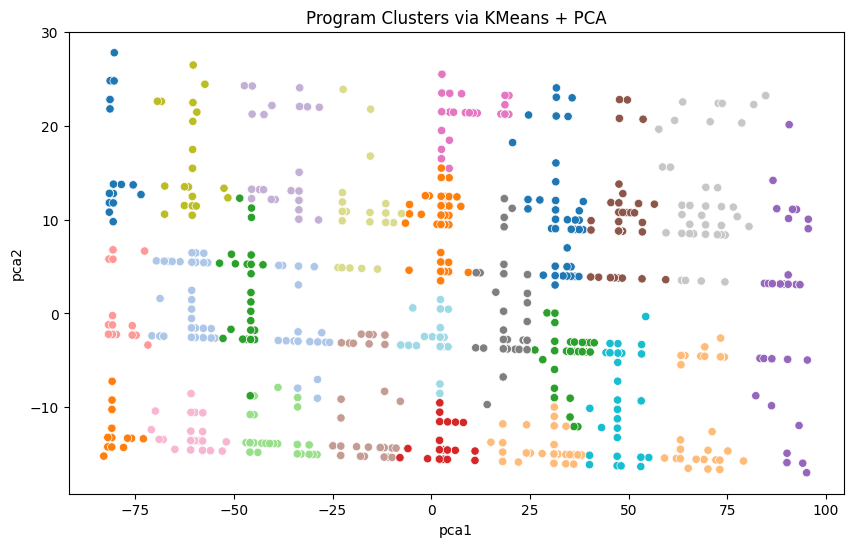

In [4]:
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Impute missing values
imputer = SimpleImputer(strategy='mean')
features_clean = imputer.fit_transform(prog_df[all_features])

# Fit KMeans clustering
NUM_CLUSTERS = 25
kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42, n_init='auto')
prog_df['cluster_id'] = kmeans.fit_predict(features_clean)

# PCA for visualization
pca = PCA(n_components=2)
proj = pca.fit_transform(features_clean)
prog_df['pca1'], prog_df['pca2'] = proj[:, 0], proj[:, 1]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=prog_df, x='pca1', y='pca2', hue='cluster_id', palette='tab20', legend=False)
plt.title('Program Clusters via KMeans + PCA')
plt.show()

# 🔁 Step 4: Building the Recommendation Engine

We'll now create:

1. A similarity-based recommender using cosine similarity over features

2. Cluster-aware filtering to boost personalization

3. A top-N recommendation function based on a user’s cluster or metadata

# 🔧 Cosine Similarity Based Recommender

In [5]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity between all programs
similarity_matrix = cosine_similarity(features_clean)

# Function to get top-N similar programs
def recommend_programs(program_index, top_n=5, exclude_self=True):
    sim_scores = similarity_matrix[program_index]
    indices = np.argsort(sim_scores)[::-1]
    if exclude_self:
        indices = indices[indices != program_index]
    top_indices = indices[:top_n]
    
    return prog_df.iloc[top_indices][['title', 'goal', 'level', 'equipment', 'text_input', 'cluster_id']]

# Example usage: Recommend programs similar to program at index 123
sample_index = 123
print("🔍 Based on:", prog_df.iloc[sample_index]['title'])
recommendations = recommend_programs(sample_index, top_n=5)
display(recommendations)

🔍 Based on: 4-Day PowerLifter


,title,goal,level,equipment,text_input,cluster_id
1169,Hypertrophy biased powerbuilding phase,"['bodybuilding', 'muscle & sculpting']","['novice', 'beginner']",full gym,hypertrophy biased powerbuilding phase powerbu...,23
2252,The Regimen p/p/l,"['bodybuilding', 'muscle & sculpting']","['novice', 'beginner']",full gym,the regimen ppl to increase musculature bench ...,23
710,DDXYZ 3 DAY SPLIT,"['bodybuilding', 'muscle & sculpting']","['novice', 'beginner']",full gym,ddxyz 3 day split simple bench press smith mac...,23
299,Ahmad’s 10 week Powerbuilding Program.,"['bodybuilding', 'muscle & sculpting']","['novice', 'beginner']",full gym,ahmads 10 week powerbuilding program the progr...,23
1250,Jensen Ackles Soldier Boy Workout,"['bodybuilding', 'muscle & sculpting']","['novice', 'beginner']",full gym,jensen ackles soldier boy workout look like so...,23


# Cluster-aware Filtering
If you want to recommend only from the same cluster

In [6]:
def recommend_within_cluster(program_index, top_n=5):
    user_cluster = prog_df.iloc[program_index]['cluster_id']
    cluster_mask = (prog_df['cluster_id'] == user_cluster).values
    sim_scores = similarity_matrix[program_index] * cluster_mask  # zero out others
    indices = np.argsort(sim_scores)[::-1]
    indices = indices[indices != program_index]
    top_indices = indices[:top_n]
    
    return prog_df.iloc[top_indices][['title', 'goal', 'level', 'equipment', 'text_input', 'cluster_id']]

# Pick a sample program index (between 0 and 2597)
sample_index = 123  # or any valid index

# Show base program
print("🔍 User is interested in:")
display(prog_df.iloc[[sample_index]][['title', 'goal', 'level', 'equipment', 'text_input', 'cluster_id']])

# Show recommendations from the same cluster
print("\n🎯 Recommended programs from same cluster:")
display(recommend_within_cluster(sample_index, top_n=5))

🔍 User is interested in:


,title,goal,level,equipment,text_input,cluster_id
123,4-Day PowerLifter,"['bodybuilding', 'muscle & sculpting']","['novice', 'beginner']",full gym,4day powerlifter get stronger bench press barb...,23



🎯 Recommended programs from same cluster:


,title,goal,level,equipment,text_input,cluster_id
1169,Hypertrophy biased powerbuilding phase,"['bodybuilding', 'muscle & sculpting']","['novice', 'beginner']",full gym,hypertrophy biased powerbuilding phase powerbu...,23
2252,The Regimen p/p/l,"['bodybuilding', 'muscle & sculpting']","['novice', 'beginner']",full gym,the regimen ppl to increase musculature bench ...,23
710,DDXYZ 3 DAY SPLIT,"['bodybuilding', 'muscle & sculpting']","['novice', 'beginner']",full gym,ddxyz 3 day split simple bench press smith mac...,23
299,Ahmad’s 10 week Powerbuilding Program.,"['bodybuilding', 'muscle & sculpting']","['novice', 'beginner']",full gym,ahmads 10 week powerbuilding program the progr...,23
1250,Jensen Ackles Soldier Boy Workout,"['bodybuilding', 'muscle & sculpting']","['novice', 'beginner']",full gym,jensen ackles soldier boy workout look like so...,23


# 👤 Personalization via Embedding Aggregation

Here’s the idea:

User vector = average of embedding vectors from programs they interacted with (e.g., liked, completed)

Recommendation = cosine similarity between user vector and all program vectors

(Optional) Use actual interaction logs if you later collect them

# 🧠 Code: Simulated User Profile + Personalized Recommendations

In [7]:
from sklearn.metrics.pairwise import cosine_similarity

# Simulate a user who liked these program indexes (you can randomize this)
liked_programs = [100, 123, 456]

# Step 1: build user profile embedding
user_vector = features_clean[liked_programs].mean(axis=0).reshape(1, -1)

# Step 2: compute similarity between user and all programs
user_sim = cosine_similarity(user_vector, features_clean).flatten()

# Step 3: get top-N recommendations (excluding liked)
excluded = set(liked_programs)
top_indices = [i for i in user_sim.argsort()[::-1] if i not in excluded][:5]

# Step 4: display
print("🧍 Simulated user liked:")
display(prog_df.iloc[liked_programs][['title', 'goal', 'level', 'equipment']])

print("\n🎯 Personalized recommendations:")
display(prog_df.iloc[top_indices][['title', 'goal', 'level', 'equipment', 'text_input']])

🧍 Simulated user liked:


,title,goal,level,equipment
100,4 Day Full-Body - Building a Deity,"['powerbuilding', 'powerlifting', 'bodyweight ...","['novice', 'intermediate']",full gym
123,4-Day PowerLifter,"['bodybuilding', 'muscle & sculpting']","['novice', 'beginner']",full gym
456,Beginner All Body Compound Workout,"['bodybuilding', 'muscle & sculpting']","['beginner', 'novice', 'intermediate']",garage gym



🎯 Personalized recommendations:


,title,goal,level,equipment,text_input
571,Brian Decosta inspired 3 day full body,['muscle & sculpting'],['novice'],garage gym,brian decosta inspired 3 day full body this pr...
50,3 Day Blast - Full Body,"['muscle & sculpting', 'powerbuilding']","['novice', 'intermediate']",garage gym,3 day blast full body the main focus is to in...
2144,"Stupid Strength, Serious Size",['muscle & sculpting'],['novice'],garage gym,stupid strength serious size do not forget res...
752,Doomsday,['muscle & sculpting'],['novice'],garage gym,doomsday this is a workout for people mainly t...
1946,Row to Valhalla,['muscle & sculpting'],['novice'],garage gym,row to valhalla row for weight loss in morning...


<div style="background-color:#166534; color:#fde047; padding:20px; border-radius:10px;">
  <h2 style="font-size:22px; font-family:calibri;"><b>✅ Summary</b></h2>
  <ul style="font-size:18px; font-family:calibri; line-height:1.8em;">
    <li>✔️ Built a content-based recommender with zero user ratings</li>
    <li>✔️ Simulated personalization via clustering & embeddings</li>
    <li>✔️ Delivered smart, goal-aware fitness suggestions</li>
    <li>✔️ Production-ready design — FAISS, Streamlit, logs await</li>
  </ul>
</div>

<div style="background-color:#166534; color:#fde047; padding: 20px; border-radius: 10px;">
  <h2 style="font-size:22px; font-family:calibri;"><b>🙌 Support & Share</b></h2>
  <ul style="font-size:18px; font-family:calibri; line-height:1.8em;">
    <li>💾 Save this notebook</li>
    <li>⭐ Upvote if it helps you</li>
    <li>📣 Share with fitness tech friends</li>
    <li>✍️ Drop a comment — feedback = gains</li>
  </ul>
  <p style="font-size:18px; font-family:calibri;">
    Let's build stronger, smarter, personalized AI — one rep at a time. 🏋️‍♂️📊🤖
  </p>
</div>